In [26]:
!pip install autoviz

In [27]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})


from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

from datetime import datetime, timedelta

import lightgbm as lgb
from catboost import CatBoostRegressor

import warnings # Supress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read in the data
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")


- If you are using AutoViz in a Jupyter notebook or Python script, you only need to install it once in your environment. You should not have to reinstall it every time you start a new session.

In [28]:
# Inspecting the type of data in the df_test dataset.

# Get the list of numerical features
numerical_feature = [feature for feature in df_test.columns if (df_test[feature].dtypes != 'O') and (df_test[feature].dtypes != "datetime64[ns]")]

# Get the list of discrete and continuous features
discrete_feature=[feature for feature in numerical_feature if len(df_test[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

# Get the list of categorical features
categorical_feature = [feature for feature in df_test.columns if feature not in numerical_feature]

# Print the feature counts
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 243
Discrete feature Count 15
Continuous feature Count 228
Categorical feature Count 2


In [29]:
# Inspecting the type of data in the df_train dataset

# Get the list of numerical features
numerical_feature = [feature for feature in df_train.columns if (df_train[feature].dtypes != 'O') and (df_train[feature].dtypes != "datetime64[ns]")]

# Get the list of discrete and continuous features
discrete_feature = [feature for feature in numerical_feature if len(df_train[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

# Get the list of categorical features
categorical_feature = [feature for feature in df_train.columns if feature not in numerical_feature]

# Print the feature counts
print("Numerical Features Count: {}".format(len(numerical_feature)))
print("Discrete Feature Count: {}".format(len(discrete_feature)))
print("Continuous Feature Count: {}".format(len(continuous_feature)))
print("Categorical Feature Count: {}".format(len(categorical_feature)))

Numerical Features Count: 244
Discrete Feature Count: 4
Continuous Feature Count: 240
Categorical Feature Count: 2


In [30]:
df_train[continuous_feature[1:]]

,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.833333,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.833333,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.833333,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.833333,225.28,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.833333,237.24,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,0.866667,312.05,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,0.866667,305.82,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,0.866667,311.62,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,0.866667,304.54,23.13,27.20,20.25,24.43,18.35,23.35,23.59,19.43,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22


In [31]:
continuous_feature

['index',
 'lon',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'contest-wind-h10-14d__wind-hgt-10',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'contest-wind-h100-14d__wind-hgt-100'

In [32]:
df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

['index',
 'lat',
 'lon',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'contest-wind-h10-14d__wind-hgt-10',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'contest-wind-h100-14d__wind-

In [33]:
df_train.shape

(375734, 246)

In [34]:
df_test.shape

(31354, 245)

In [35]:
# Drop index column
df_train = df_train.drop('index', axis=1)

- "contest-tmp2m-14d__tmp2m" is the target colum to predict.

In [36]:
# get column names as sets
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

# find the difference between train_cols and test_cols
target = train_cols.difference(test_cols).pop()

# print the target column name
print(target)


contest-tmp2m-14d__tmp2m


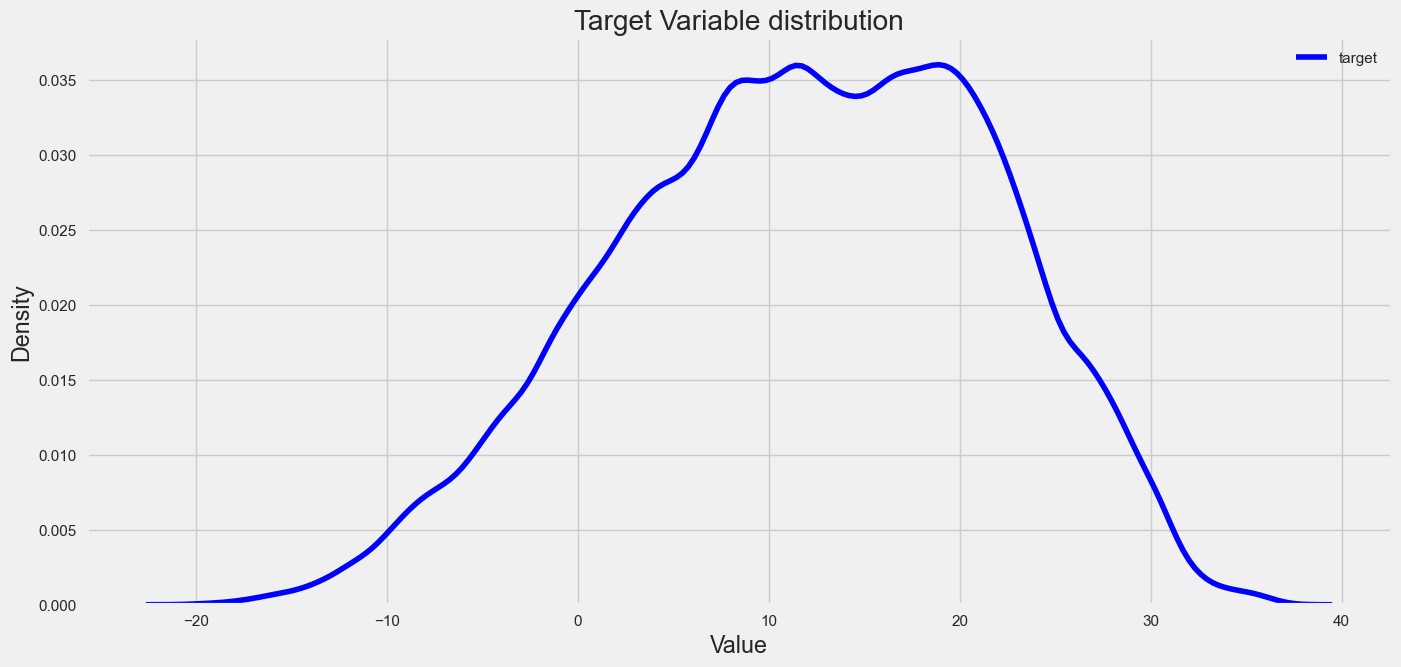

In [37]:
# Plotting target variable in df_train
def histogram_plot(data, label, title):
    plt.figure(figsize=(15,7))
    sns.kdeplot(data, color='blue', label=label)
    plt.legend()
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

histogram_plot(data=df_train['contest-tmp2m-14d__tmp2m'], label="target", title="Target Variable distribution")


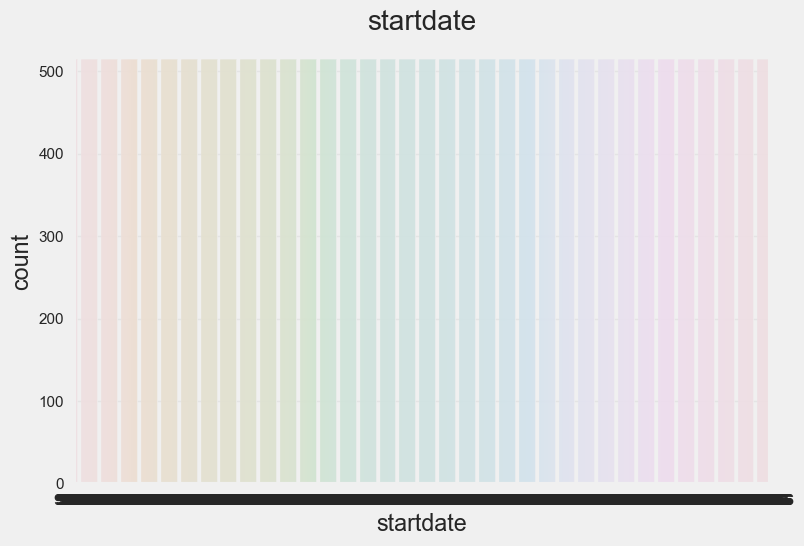

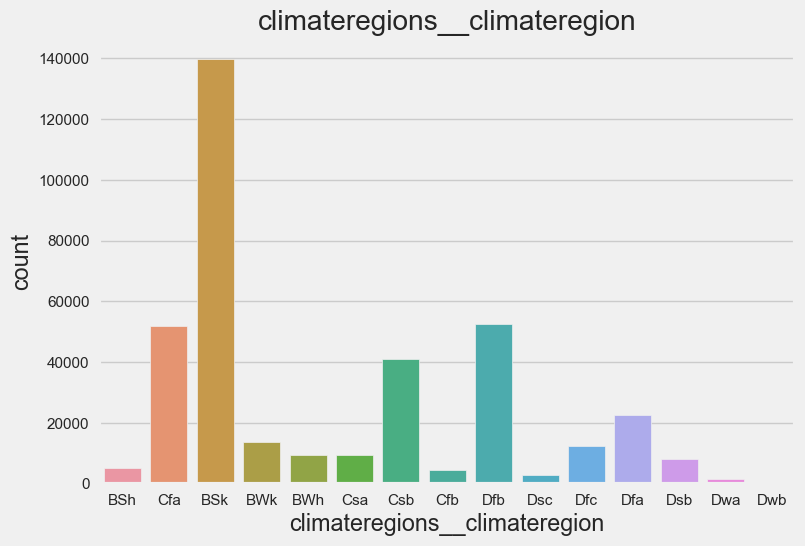

In [38]:
# Plotting categorical columns
for column in df_train.select_dtypes(include=['object']).columns:
    sns.countplot(data=df_train, x=column)
    plt.title(column)
    plt.show()


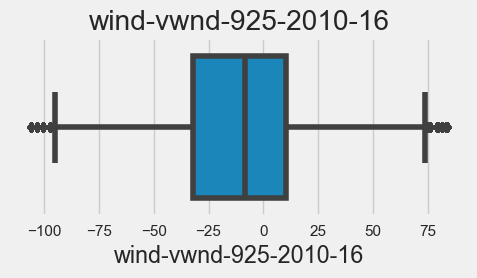

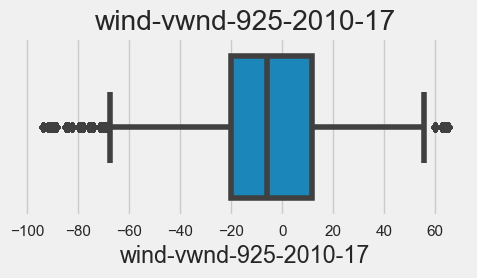

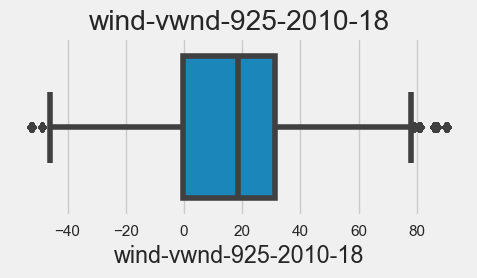

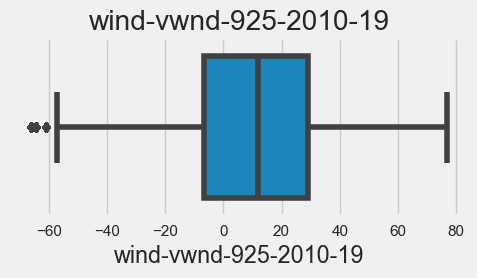

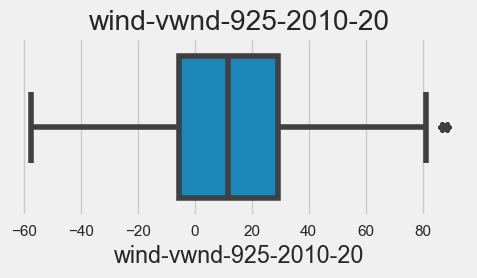

In [39]:
# Plotting numerical columns
num_cols = df_train.columns
def plot_boxplots(data, column_list):
    num_cols = column_list
    for col in num_cols:
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=data[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
        
plot_boxplots(df_train, num_cols[-5:])

### Analyzing feature distribution
Analyzing feature distribution in two datasets involves comparing the distribution of one or more features (or variables) between two different datasets.

This is often done to determine whether there are any significant differences in the distribution of the features between the two datasets. 

One common way to compare feature distributions is to create a histogram or density plot for each dataset and visually compare the two plots. You can also use statistical tests, such as the Kolmogorov-Smirnov test or the Mann-Whitney U test, to determine if there is a significant difference in the distributions of the features between the two datasets.

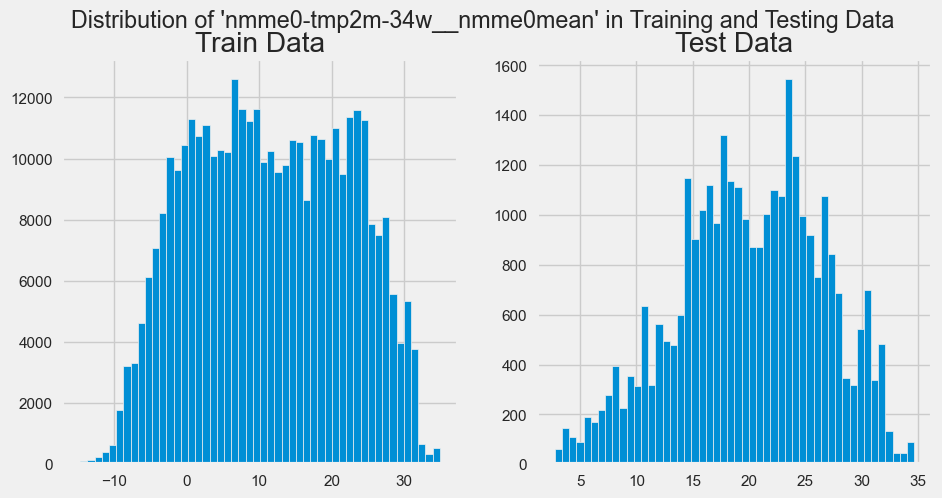

In [40]:
def train_test_feature_dist(df_train, df_test, feature):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram of the feature for the training dataset
    axs[0].set_title('Train Data')
    axs[0].hist(df_train[feature], bins=50)

    # Plot the histogram of the feature for the testing dataset
    axs[1].set_title('Test Data')
    axs[1].hist(df_test[feature], bins=50)

    # Set the title and display the plot
    fig.suptitle(f"Distribution of '{feature}' in Training and Testing Data")
    plt.show()
        
train_test_feature_dist(df_train, df_test, 'nmme0-tmp2m-34w__nmme0mean')

### Data Cleaning

In [41]:
data_cleaning_suggestions(df_train)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
contest-tmp2m-14d__tmp2m,375636,float64,0,0.000000,99.973918,0,
contest-pres-sfc-gauss-14d__pres,346455,float64,0,0.000000,92.207519,0,
contest-slp-14d__slp,138455,float64,0,0.000000,36.849207,0,
contest-wind-h10-14d__wind-hgt-10,124346,float64,0,0.000000,33.094157,0,
contest-wind-h100-14d__wind-hgt-100,75658,float64,0,0.000000,20.136054,0,
contest-pevpr-sfc-gauss-14d__pevpr,74166,float64,0,0.000000,19.738964,0,
contest-wind-h500-14d__wind-hgt-500,53392,float64,0,0.000000,14.210053,0,
contest-wind-h850-14d__wind-hgt-850,18279,float64,0,0.000000,4.864878,0,
contest-precip-14d__precip,16961,float64,0,0.000000,4.514098,0,skewed: cap or drop outliers
nmme-prate-34w__ccsm4,11009,float64,0,0.000000,2.929998,0,skewed: cap or drop outliers


In [42]:
for col in df_train.columns:
    print(col)

lat
lon
startdate
contest-pevpr-sfc-gauss-14d__pevpr
nmme0-tmp2m-34w__cancm30
nmme0-tmp2m-34w__cancm40
nmme0-tmp2m-34w__ccsm30
nmme0-tmp2m-34w__ccsm40
nmme0-tmp2m-34w__cfsv20
nmme0-tmp2m-34w__gfdlflora0
nmme0-tmp2m-34w__gfdlflorb0
nmme0-tmp2m-34w__gfdl0
nmme0-tmp2m-34w__nasa0
nmme0-tmp2m-34w__nmme0mean
contest-wind-h10-14d__wind-hgt-10
nmme-tmp2m-56w__cancm3
nmme-tmp2m-56w__cancm4
nmme-tmp2m-56w__ccsm3
nmme-tmp2m-56w__ccsm4
nmme-tmp2m-56w__cfsv2
nmme-tmp2m-56w__gfdl
nmme-tmp2m-56w__gfdlflora
nmme-tmp2m-56w__gfdlflorb
nmme-tmp2m-56w__nasa
nmme-tmp2m-56w__nmmemean
contest-rhum-sig995-14d__rhum
nmme-prate-34w__cancm3
nmme-prate-34w__cancm4
nmme-prate-34w__ccsm3
nmme-prate-34w__ccsm4
nmme-prate-34w__cfsv2
nmme-prate-34w__gfdl
nmme-prate-34w__gfdlflora
nmme-prate-34w__gfdlflorb
nmme-prate-34w__nasa
nmme-prate-34w__nmmemean
contest-wind-h100-14d__wind-hgt-100
nmme0-prate-56w__cancm30
nmme0-prate-56w__cancm40
nmme0-prate-56w__ccsm30
nmme0-prate-56w__ccsm40
nmme0-prate-56w__cfsv20
nmme0-prate-

In [43]:
# Checking for missing values in the df_test dataset
df_test.isna().count()


index                                 31354
lat                                   31354
lon                                   31354
startdate                             31354
contest-pevpr-sfc-gauss-14d__pevpr    31354
                                      ...  
wind-vwnd-925-2010-16                 31354
wind-vwnd-925-2010-17                 31354
wind-vwnd-925-2010-18                 31354
wind-vwnd-925-2010-19                 31354
wind-vwnd-925-2010-20                 31354
Length: 245, dtype: int64

In [44]:
df_test.isnull().any(axis=0).sum()

0

In [45]:
# Checking for missing values in the df_train dataset
df_train.isna().count()

lat                                   375734
lon                                   375734
startdate                             375734
contest-pevpr-sfc-gauss-14d__pevpr    375734
nmme0-tmp2m-34w__cancm30              375734
                                       ...  
wind-vwnd-925-2010-16                 375734
wind-vwnd-925-2010-17                 375734
wind-vwnd-925-2010-18                 375734
wind-vwnd-925-2010-19                 375734
wind-vwnd-925-2010-20                 375734
Length: 245, dtype: int64

In [46]:
df_train.isnull().any(axis=0).sum()

8

In [47]:
print(f"test_shape:{df_test.shape},train_shape:{df_train.shape}")

test_shape:(31354, 245),train_shape:(375734, 245)


- Handling Missing values in df_train dataset
- Why pay attention to missing values? It can cause bias and lead to inaccurate results, so addressing it should be a priority.

In [48]:
# The following code calculates the total number of missing values in each column and converts it to a numpy array, enabling
# us to retrieve the names of columns with missing values later

miss_val_arr = df_train.isnull().sum().to_numpy()

miss_val_arr

array([    0,     0,     0,     0,     0,     0, 15934,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 10280,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  8738,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0, 15934,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 15934,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 10280,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,  8738,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       15934,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [49]:
# The code block below will display the names of columns with missing values.

miss_vals_cols = [] # This variable holds the names of columns with missing values
df_train_cols = df_train.columns.to_numpy() # the code transforms columns into a numpy array

for index, value in enumerate(miss_val_arr):
    if value > 0:
        miss_vals_cols.append(df_train_cols[index])
       
print(miss_vals_cols)

['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3', 'nmme-tmp2m-34w__ccsm3', 'ccsm30']


In [50]:
# The code block below will display number of missing values per column.

num_miss_val_per_col = []

for index, column in enumerate(df_train_cols):
    if column in miss_vals_cols:
        num_miss_val_per_col.append(miss_val_arr[index])
  
print(num_miss_val_per_col)

[15934, 10280, 8738, 15934, 15934, 10280, 8738, 15934]


In [51]:
# This provides us with all the rows that have a null value

mask = df_train.isnull().any(axis=1) 

df_train_missing_vals = df_train.loc[mask, miss_vals_cols] 

df_train_missing_vals.head()

,nmme0-tmp2m-34w__ccsm30,nmme-tmp2m-56w__ccsm3,nmme-prate-34w__ccsm3,nmme0-prate-56w__ccsm30,nmme0-prate-34w__ccsm30,nmme-prate-56w__ccsm3,nmme-tmp2m-34w__ccsm3,ccsm30
356,NaN,28.88,0.64,19.37,NaN,8.31,0.64,28.88
357,NaN,28.67,0.57,19.37,NaN,9.53,0.57,28.88
358,NaN,28.46,0.50,19.37,NaN,10.74,0.50,28.88
359,NaN,28.26,0.43,19.37,NaN,11.96,0.43,28.88
360,NaN,28.05,0.36,19.37,NaN,13.18,0.36,28.88


- Visualizing the missing data using Missingno. 
- Missingno is a Python library that works with pandas and has great visualization capabilities for displaying the distribution of NaN values. Built on matplotlib, it generates static graphs.

In [52]:
import missingno as msno


<AxesSubplot:>

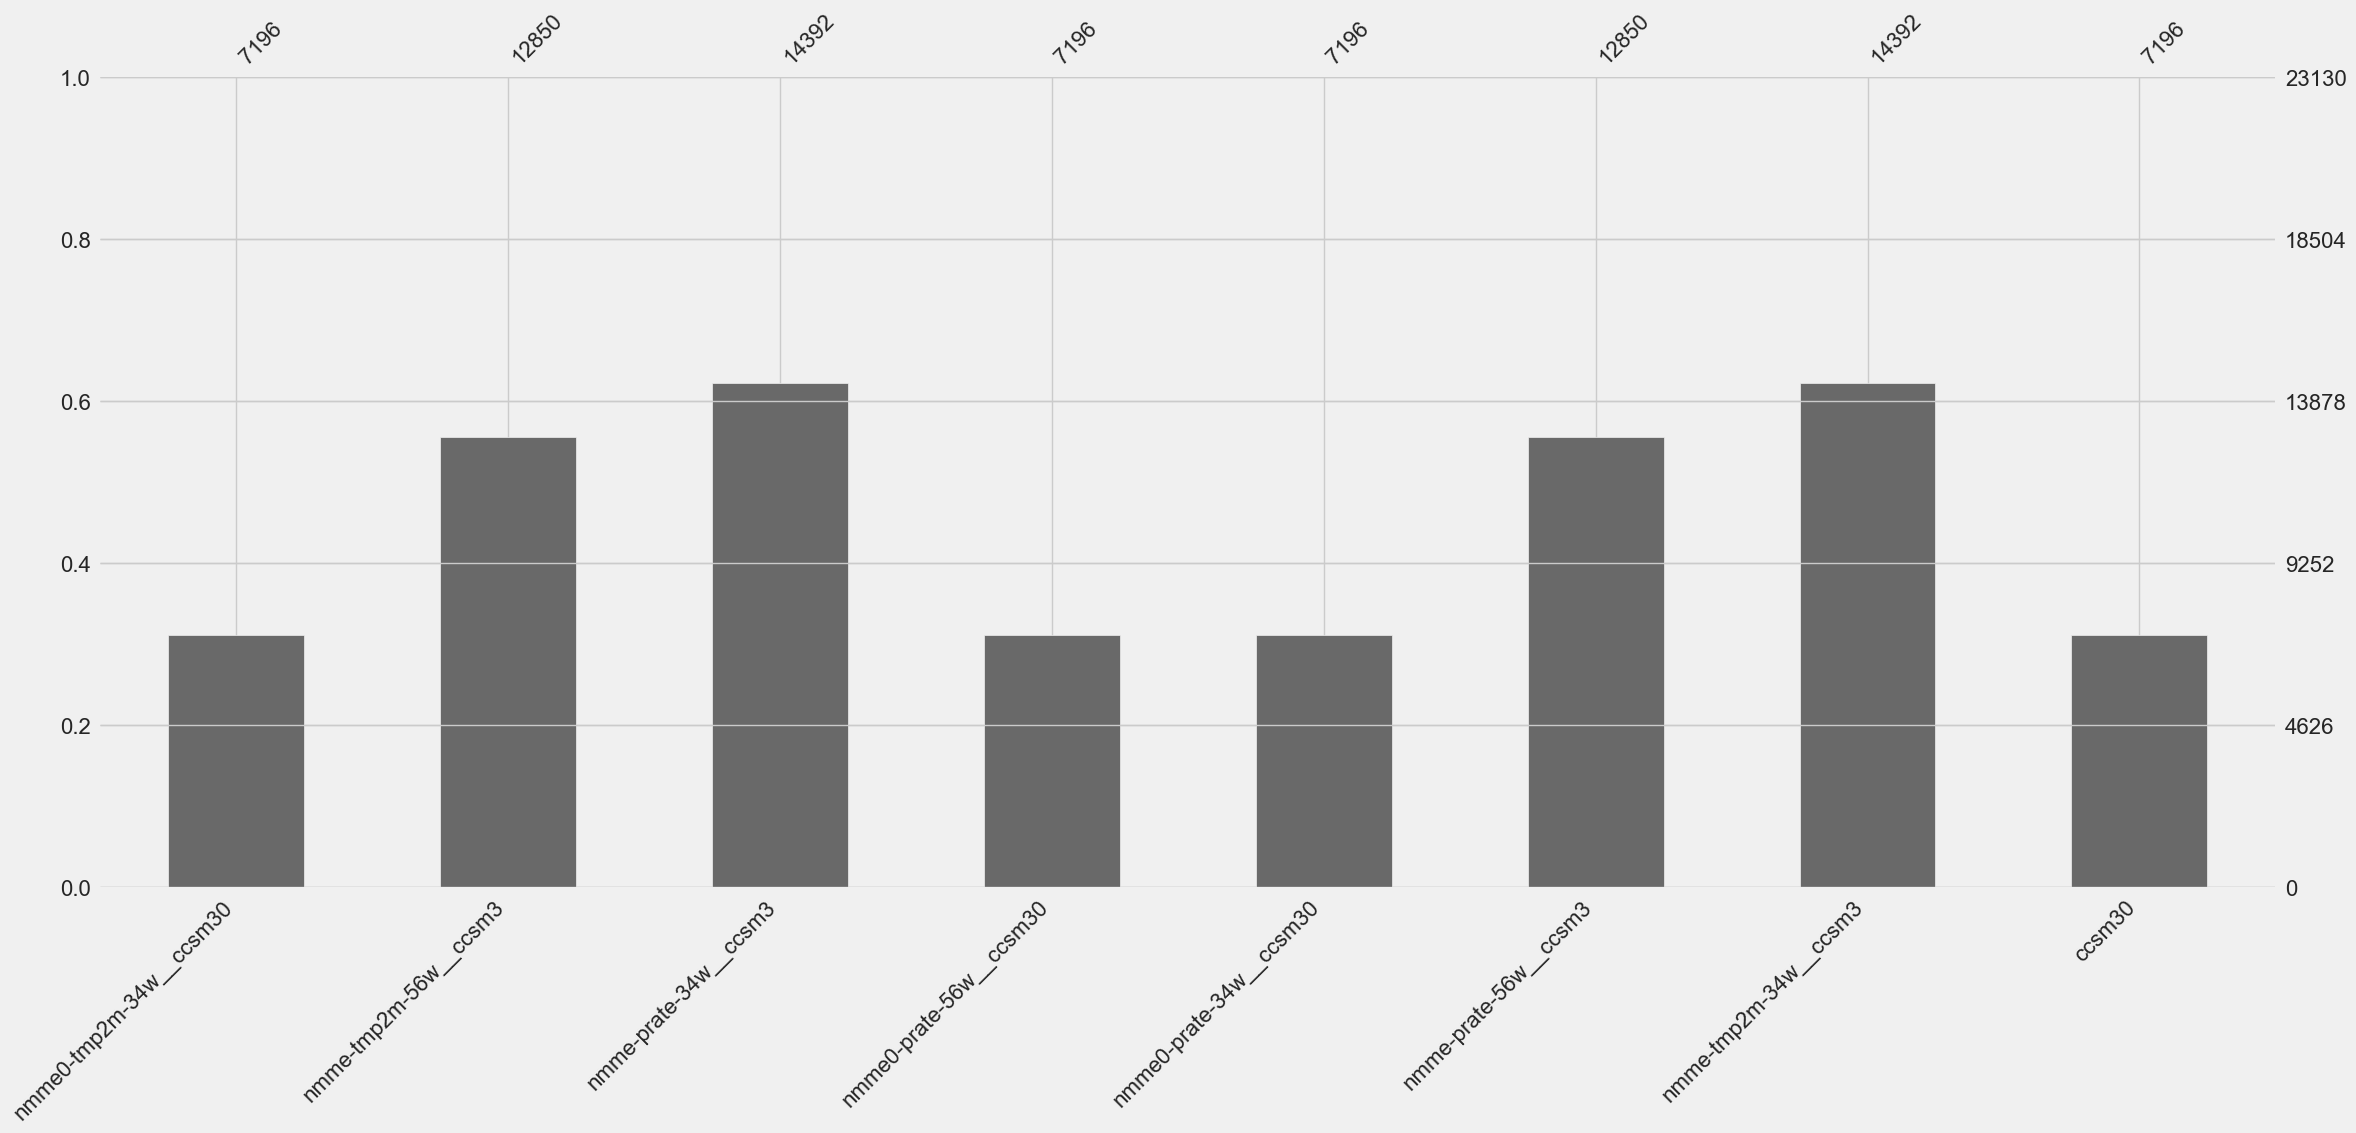

In [53]:
msno.bar(df_train_missing_vals)

- The plot above indicates that there are 23130 data points, which implies that each column contains missing values. For example, the "ccsm30" column has 7196 data points and 15934 missing values.

In [54]:
# Replace the missing values in each column with the respective column's mean value.
for col in miss_vals_cols:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

In [55]:
# Detecting percentage of outliers in the data
from scipy import stats

def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            z_scores = stats.zscore(data[column])
            abs_z_scores = np.abs(z_scores)
            threshold = 3
            outliers = data[abs_z_scores > threshold][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')

detect_outliers(df_train)


,Outlier_percentage
lat,0.000000
mei__nip,0.000000
wind-hgt-850-2010-1,0.000000
wind-hgt-850-2010-4,0.000000
wind-hgt-850-2010-5,0.000000
...,...
nmme0-prate-34w__ccsm40,2.148062
contest-precip-14d__precip,2.222051
nmme-prate-34w__cancm3,2.231632
nmme-prate-56w__cancm3,2.403828


In [108]:
df_train.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,index,loc_group_x,loc_group_y,year,month,day
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,0.0,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,11.694567,...,-6.231860,16.014364,10.489945,11.296334,NaN,187501.500000,187501.500000,2015.166895,6.519836,15.738714
std,0.251744,0.272059,198.085182,10.952417,11.073553,10.118011,10.574276,9.403434,10.689967,10.681607,...,27.050356,25.847455,25.070435,25.113214,NaN,108465.002085,108465.002085,0.687627,3.449555,8.803932
min,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,-13.520000,...,-93.980000,-52.610000,-66.110000,-57.610000,NaN,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.409091,0.300000,104.062500,1.550000,3.650000,1.970000,3.080000,3.390000,2.970000,2.910000,...,-20.170000,-0.360000,-6.790000,-5.570000,NaN,93568.000000,93568.000000,2015.000000,4.000000,8.000000
50%,0.590909,0.533333,250.320000,9.950000,11.890000,10.099323,11.600000,10.890000,11.280000,11.240000,...,-6.030000,18.650000,11.860000,11.650000,NaN,187501.500000,187501.500000,2015.000000,7.000000,16.000000
75%,0.818182,0.766667,420.010000,20.230000,22.110000,18.360000,20.360000,18.330000,20.300000,20.160000,...,11.630000,31.210000,29.040000,29.180000,NaN,281435.000000,281435.000000,2016.000000,10.000000,23.000000
max,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,38.450000,...,64.850000,90.390000,76.890000,88.660000,NaN,375003.000000,375003.000000,2016.000000,12.000000,31.000000


- To explore the distribution of various features in both the train and test datasets, you can attempt to visualize the distributions of individual features.

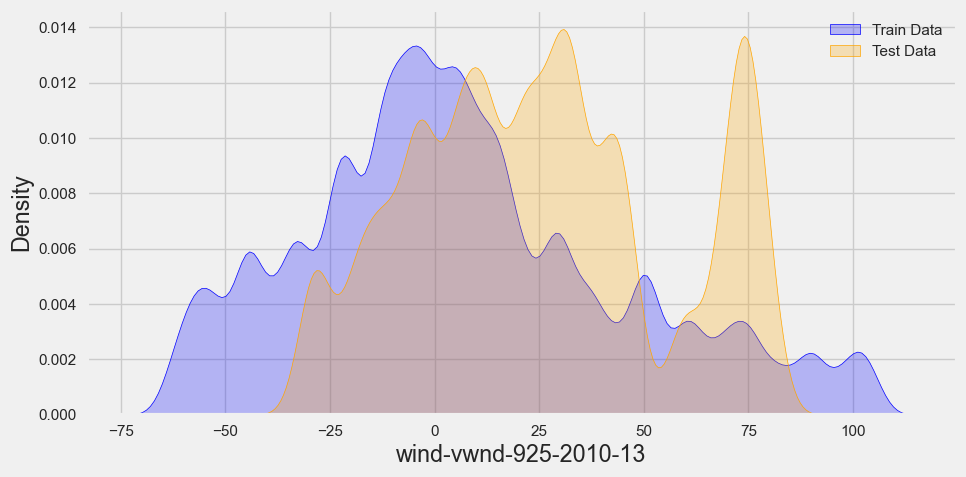

In [57]:
def train_test_dist(train, test):
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.kdeplot(data=train,  color='blue', fill=True, ax=ax, label="Train Data")
    sns.kdeplot(data=test, color='orange', fill=True, ax=ax, label="Test Data")
    plt.legend()
    plt.show()

train_target = df_train['contest-pevpr-sfc-gauss-14d__pevpr']
test_target = df_test['contest-pevpr-sfc-gauss-14d__pevpr']


train_target = df_train['wind-vwnd-925-2010-13']
test_target = df_test['wind-vwnd-925-2010-13']
train_test_dist(train_target, test_target)

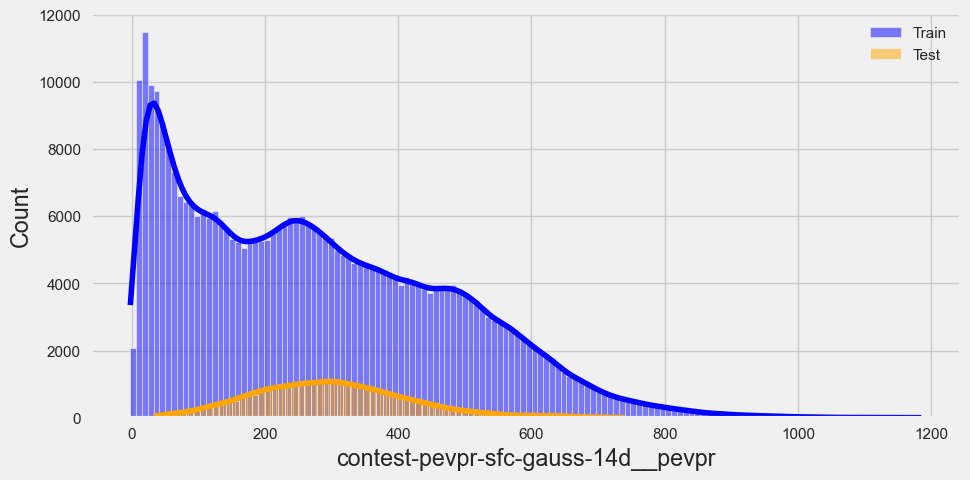

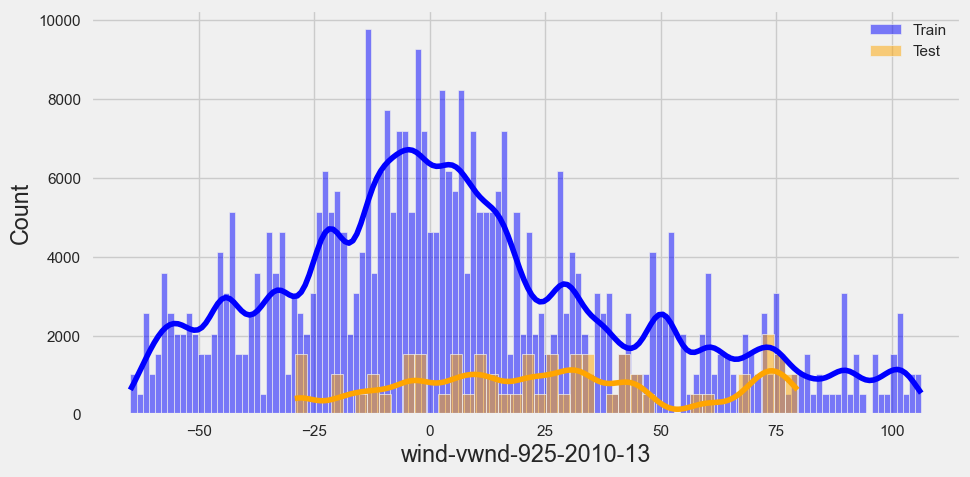

In [58]:
def train_test_dist(train, test, variable_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(train[variable_name], color='blue', label='Train', ax=ax, kde=True)
    sns.histplot(test[variable_name], color='orange', label='Test', ax=ax, kde=True)
    plt.legend()
    plt.show()

variable_name = 'contest-pevpr-sfc-gauss-14d__pevpr'
train_test_dist(df_train, df_test, variable_name)

variable_name = 'wind-vwnd-925-2010-13'
train_test_dist(df_train, df_test, variable_name)


- As this is a time series problem, we should convert the startdate to a datetime format to facilitate handling.

In [59]:
df_train.startdate = pd.to_datetime(df_train.startdate)
df_test.startdate = pd.to_datetime(df_test.startdate)

In [60]:
# Checking the date range in the df_test and df_train datasets.

df_test['startdate'] = pd.to_datetime(df_test['startdate'])
df_train['startdate'] = pd.to_datetime(df_train['startdate'])
print(df_test['startdate'].min(),df_test['startdate'].max())
print(df_train['startdate'].min(),df_train['startdate'].max())

2022-11-01 00:00:00 2022-12-31 00:00:00
2014-09-01 00:00:00 2016-08-31 00:00:00


The above output shows that the test dataset includes dates from the final two months of 2022, while the training dataset encompasses a broader range of two years, from September 2014 to August 2016.

In [61]:
# Clustering places based on latitude and longitude.

df_test_group = df_test.groupby(['lat', 'lon']).size()
df_test_group

lat       lon     
0.000000  0.833333    61
          0.866667    61
0.045455  0.833333    61
          0.866667    61
          0.900000    61
                      ..
1.000000  0.733333    61
          0.766667    61
          0.800000    61
          0.833333    61
          0.866667    61
Length: 514, dtype: int64

In [62]:
df_train_group = df_train.groupby(['lat', 'lon']).size()
df_train_group

lat       lon     
0.000000  0.833333    731
          0.866667    731
0.045455  0.833333    731
          0.866667    731
          0.900000    731
                     ... 
1.000000  0.733333    731
          0.766667    731
          0.800000    731
          0.833333    731
          0.866667    731
Length: 514, dtype: int64

In [63]:
# Aggregate the data within each group for df_test dataset

aggregated_df_test = df_test_group.aggregate(['mean', 'count'])
aggregated_df_test

mean      61.0
count    514.0
dtype: float64

In [64]:
# Aggregate the data within each group for df_train dataset

aggregated_df_train = df_train_group.aggregate(['mean', 'count'])
aggregated_df_train

mean     731.0
count    514.0
dtype: float64

Each coordinate (latitude, longitude) has 731 data points for each day over a two-year period. The training and test data include 514 unique locations.

In the following code, the concat method is called with the ignore_index argument set to True, which causes the resulting data frame to have a new, monotonic index rather than preserving the original indices from the individual df_test and df_train data frames.

The new feature loc_group is created by first extracting the unique combinations of lat and lon values from df_test_train and storing them in a new data frame locations. A new column loc_group is then created in locations to store the index of each unique combination. Finally, the original df_test_train data frame is merged with the locations data frame on the lat and lon columns using a left join. This causes each row in df_test_train to be associated with the appropriate loc_group value.

With the number of unique locations being printed and the original df_test and df_train data frames being split out from the combined df_test_train data frame.

In [65]:
# Combine train and test data into a single dataset
df_test_train = pd.concat([df_train, df_test], ignore_index=True)

# Generate a new feature.
locations = df_test_train[['lat', 'lon']].drop_duplicates()
locations['loc_group'] = locations.index
df_test_train = df_test_train.merge(locations, on=['lat', 'lon'], how='left')

print(f'{locations.loc_group.nunique()} unique locations')

# Separate the combined data into its original parts.
df_train = df_test_train.iloc[:len(df_train)]
df_test = df_test_train.iloc[len(df_train):]

575 unique locations


The output of the code below would show the loc_group values that are present in either the df_train or the df_test data frame, but not in both. This can give an idea about the distribution of the loc_group values across the train and test data, and can help identify any potential issues such as data leakage or a mismatch in the data distribution between the train and test sets.

If the output shows that there are loc_group values in the test data that are not present in the train data, it may indicate a potential issue with the data splitting or preprocessing steps that were performed. On the other hand, if the output shows that all loc_group values are present in both data frames, it suggests that the data is well-balanced and that the machine learning model will have a good chance of generalizing well.

In [66]:
# Get unique values of loc_group in both train and test data frames
train_locations = set(df_train.loc_group.unique())
test_locations = set(df_test.loc_group.unique())

# Find locations in df_train which are not in df_test
locations_in_train = train_locations - test_locations
print("Locations in the train data that are not present in the test data: ", locations_in_train)

# Find locations in df_test which are not in df_train
locations_in_test = test_locations - train_locations
print("Locations in the test data that are not present in the train data: ", locations_in_test)

Locations in the train data that are not present in the test data:  {27778, 88451, 83334, 364038, 78217, 73100, 35088, 29971, 90644, 24854, 85527, 80410, 75293, 37281, 285090, 345763, 32164, 27047, 181288, 87720, 82603, 264622, 138159, 77486, 72369, 325295, 34357, 29240, 89913, 244154, 117691, 84796, 24123, 304827, 79679, 74562, 223686, 97223, 36550, 31433, 26316, 86989, 81872, 76755, 33626, 28509, 89182, 84065, 78948, 73831, 40936, 35819, 30702, 58480, 25585, 86258, 81141, 202487, 76024, 159358, 32895}
Locations in the test data that are not present in the train data:  {382200, 378113, 381956, 383237, 377991, 381834, 383115, 377869, 379150, 382993, 385555, 377747, 401171, 382871, 382749, 394400, 378784, 382627, 399524, 378662, 389032, 382505, 378540, 382383, 378418, 382261, 392631, 378296, 382139, 378174, 387263, 402879, 382017, 383298, 378052, 380614, 381895, 383176, 377930, 396108, 381773, 383054, 390862, 377808, 382932, 382810, 378845, 406112, 382688, 378723, 382566, 383847, 378601

In [67]:
# Get the rows with index 159358 in df_train and 13298 in df_test
train_row = df_train.loc[159358]
test_row = df_test.loc[383847]

# Print the location group and the latitude/longitude values for each row
print('train_location:', train_row['loc_group'])
print('train_latitude:', train_row['lat'], 'train_longitude:', train_row['lon'])
print('test_location:', test_row['loc_group'])
print('test_latitude:', test_row['lat'], 'test_longitude:', test_row['lon'])

train_location: 159358
train_latitude: 0.5454545454545454 train_longitude: 0.3666666666666666
test_location: 383847
test_latitude: 0.4090909090909091 test_longitude: 0.3666666666666665


- The output of the code reveals a minor difference in the latitude and longitude coordinates, which might be due to precision errors. However, it is apparent that the latitude and longitude coordinates still correspond to the same location.
- To resolve the precision error at the 16th place, we will round the values to the 14th decimal place.

In [68]:
# This code uses pandas DataFrame's round method to round the values in the lat and lon columns to 14 decimal places. By passing 14 to the round method, the values in the lat and lon columns are rounded to 14 decimal places.
df_train[['lat','lon']] = df_train[['lat','lon']].round(14)
df_test[['lat','lon']] = df_test[['lat','lon']].round(14)

In [69]:
# Combine train and test data into a single dataset
df_test_train = pd.concat([df_train, df_test], ignore_index=True)

# Generate a new feature.
locations = df_test_train[['lat', 'lon']].drop_duplicates()
locations['loc_group'] = locations.index
df_test_train = df_test_train.merge(locations, on=['lat', 'lon'], how='left')

print(f'{locations.loc_group.nunique()} unique locations')

# Separate the combined data into its original parts.
df_train = df_test_train.iloc[:len(df_train)]
df_test = df_test_train.iloc[len(df_train):]

514 unique locations


As a result of the rounding, we now have only 514 unique locations, down from 575.

## Feature Engineering

In [70]:
#Define a function called add_season that takes in two dataframes train and test
def add_season(df_train, df_test):
    
    # Create a dictionary called month_to_season that maps each month to a season
    month_to_season_dict = {
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
        6: 2,
        7: 2,
        8: 2,
        9: 3,
        10: 3,
        11: 3,
        12: 0
    }
    # Use the map method to apply the month_to_season mapping to the month column of both train and test
    df_train['season'] = df_train['month'].map(month_to_season_dict)
    df_test['season'] = df_test['month'].map(month_to_season_dict)
    
    # Return the updated train and test dataframes
    return df_train, df_test

# Define a function called encode_cyclical that takes in a dataframe df
def encode_cyclical(df):
    # Create function transformers for sine and cosine transformations
    sin_transformer = FunctionTransformer(lambda x: np.sin(x))
    cos_transformer = FunctionTransformer(lambda x: np.cos(x))

    # Calculate the day of year as a value between 0 and 2π, where 0 is January 1st and 2π is December 31st
    day_of_year = df['day'] * 2 * np.pi / 365
    df['day_of_year_sin'] = sin_transformer.fit_transform(day_of_year)
    df['day_of_year_cos'] = cos_transformer.fit_transform(day_of_year)

    # encode month as sine and cosine with period of 12
    month = df['month'] * 2 * np.pi / 12
    df['month_sin'] = sin_transformer.fit_transform(month)
    df['month_cos'] = cos_transformer.fit_transform(month)

    # Calculate the season as a value between 0 and 2π, where 0 is winter and 2π is fall
    season = df['season'] * 2 * np.pi / 4
    df['season_sin'] = sin_transformer.fit_transform(season)
    df['season_cos'] = cos_transformer.fit_transform(season)

    # Return the updated dataframe df
    return df


- Standardize the new features, as it is a common prerequisite for numerous machine learning algorithms.

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def location_feature(train, test):

    scale = 14
    train.loc[:,'lat']=round(train.lat,scale)
    train.loc[:,'lon']=round(train.lon,scale)
    test.loc[:,'lat']=round(test.lat,scale)
    test.loc[:,'lon']=round(test.lon,scale)
    
    train_and_test = pd.concat([train, test], axis=0)
    train_and_test['loc_group'] = train_and_test.groupby(['lat', 'lon']).ngroup()
    print(f'{train_and_test.loc_group.nunique()} unique locations')
    
    train = train_and_test.iloc[:len(train)]
    test = train_and_test.iloc[len(train):].drop(target, axis=1)
    
    return train, test

def cat_encode(train, test):
    # encoding the categorical feature in the train and test data set
    # using OneHotEncoder
    ohe = OneHotEncoder()
    train_encoded = ohe.fit_transform(train[['climateregions__climateregion']])
    test_encoded = ohe.transform(test[['climateregions__climateregion']])
    
    train = train.drop(['climateregions__climateregion'], axis=1)
    test = test.drop(['climateregions__climateregion'], axis=1)
    
    train_encoded = pd.DataFrame(train_encoded.toarray(), columns=ohe.get_feature_names_out(['climateregions__climateregion']))
    test_encoded = pd.DataFrame(test_encoded.toarray(), columns=ohe.get_feature_names_out(['climateregions__climateregion']))
    
    train = pd.concat([train, train_encoded], axis=1)
    test = pd.concat([test, test_encoded], axis=1)
    
    return train, test

    
def fill_na_rows(dataset):
    # Find the columns with missing values
    columns_with_missing_values = dataset.columns[dataset.isnull().any()].tolist()
    
    # Impute the missing values with the mean value of that column
    for col in columns_with_missing_values:
        dataset[col].fillna(dataset[col].mean(), inplace=True)
        
    return dataset

def create_new_time_feature(dataset):
    dataset['year']=pd.DatetimeIndex(dataset['startdate']).year 
    dataset['month']=pd.DatetimeIndex(dataset['startdate']).month 
    dataset['day']=pd.DatetimeIndex(dataset['startdate']).day
    return dataset

def feature_engineering(origin_train, origin_test):
    train, test = origin_train, origin_test
    train = fill_na_rows(train)
    
    train = create_new_time_feature(train)
    test = create_new_time_feature(test)
    
    train, test = cat_encode(train, test)
    train, test = add_season(train, test) # adding season feature
    
    train = encode_cyclical(train) # adding more time features for train data
    test = encode_cyclical(test) #adding more time features for train data
    
    
    irrelevant_cols = ['index', 'startdate']
    X = train.drop([x for x in irrelevant_cols if x in train.columns], axis=1)
    X_test = test.drop([x for x in irrelevant_cols if x in test.columns], axis=1)

    y = train[target]
    
    X = X.drop(target, axis=1)
    X_test = X_test.drop(target, axis=1)
    
    
    return X, y, X_test

#defining metric
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

In [72]:
X, y, X_test = feature_engineering(df_train, df_test)

## Modeling
### Developing algorithms to predict future values in a time series
Time series data is a collection of observations that are recorded at regular intervals, such as daily, weekly, or monthly, over a specific period of time. Examples of time series data include stock prices, weather data, and economic indicators.

The goal of modeling time series data is to understand the underlying patterns and relationships within the data and to use this information to make predictions about future values in the series. Various techniques can be used to model time series data, such as autoregressive integrated moving average (ARIMA) models, exponential smoothing methods, and machine learning algorithms. These models can help in forecasting future values, identifying trends and seasonality patterns, and making data-driven decisions.

####  "contest-tmp2m-14d__tmp2m" is the target colum to predict

### CatBoost

In [73]:
# Import required libraries
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data

X = df_train[continuous_feature]
y = df_train[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor
model = CatBoostRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Learning rate set to 0.100855
0:	learn: 8.9256463	total: 339ms	remaining: 5m 39s
1:	learn: 8.0725235	total: 498ms	remaining: 4m 8s
2:	learn: 7.2993351	total: 661ms	remaining: 3m 39s
3:	learn: 6.6066124	total: 814ms	remaining: 3m 22s
4:	learn: 5.9764531	total: 967ms	remaining: 3m 12s
5:	learn: 5.4043647	total: 1.13s	remaining: 3m 6s
6:	learn: 4.8954591	total: 1.29s	remaining: 3m 3s
7:	learn: 4.4330003	total: 1.46s	remaining: 3m
8:	learn: 4.0208009	total: 1.61s	remaining: 2m 57s
9:	learn: 3.6453064	total: 1.76s	remaining: 2m 53s
10:	learn: 3.3071156	total: 1.91s	remaining: 2m 51s
11:	learn: 2.9987648	total: 2.07s	remaining: 2m 50s
12:	learn: 2.7189373	total: 2.23s	remaining: 2m 49s
13:	learn: 2.4684312	total: 2.37s	remaining: 2m 47s
14:	learn: 2.2366489	total: 2.52s	remaining: 2m 45s
15:	learn: 2.0315276	total: 2.67s	remaining: 2m 43s
16:	learn: 1.8426507	total: 2.79s	remaining: 2m 41s
17:	learn: 1.6727273	total: 2.95s	remaining: 2m 40s
18:	learn: 1.5192888	total: 3.09s	remaining: 2m 39s

159:	learn: 0.1412900	total: 19.7s	remaining: 1m 43s
160:	learn: 0.1409851	total: 19.8s	remaining: 1m 43s
161:	learn: 0.1407649	total: 19.9s	remaining: 1m 42s
162:	learn: 0.1405145	total: 20s	remaining: 1m 42s
163:	learn: 0.1401728	total: 20.1s	remaining: 1m 42s
164:	learn: 0.1397683	total: 20.3s	remaining: 1m 42s
165:	learn: 0.1395042	total: 20.4s	remaining: 1m 42s
166:	learn: 0.1388591	total: 20.5s	remaining: 1m 42s
167:	learn: 0.1387006	total: 20.6s	remaining: 1m 42s
168:	learn: 0.1384402	total: 20.7s	remaining: 1m 41s
169:	learn: 0.1382014	total: 20.8s	remaining: 1m 41s
170:	learn: 0.1376718	total: 20.9s	remaining: 1m 41s
171:	learn: 0.1374981	total: 21s	remaining: 1m 41s
172:	learn: 0.1369586	total: 21.1s	remaining: 1m 41s
173:	learn: 0.1367493	total: 21.2s	remaining: 1m 40s
174:	learn: 0.1366029	total: 21.4s	remaining: 1m 40s
175:	learn: 0.1363184	total: 21.5s	remaining: 1m 40s
176:	learn: 0.1361578	total: 21.6s	remaining: 1m 40s
177:	learn: 0.1358270	total: 21.7s	remaining: 1m 4

315:	learn: 0.1084214	total: 38.2s	remaining: 1m 22s
316:	learn: 0.1082787	total: 38.4s	remaining: 1m 22s
317:	learn: 0.1081991	total: 38.5s	remaining: 1m 22s
318:	learn: 0.1080721	total: 38.6s	remaining: 1m 22s
319:	learn: 0.1079990	total: 38.7s	remaining: 1m 22s
320:	learn: 0.1078246	total: 38.8s	remaining: 1m 22s
321:	learn: 0.1077270	total: 38.9s	remaining: 1m 21s
322:	learn: 0.1075160	total: 39s	remaining: 1m 21s
323:	learn: 0.1073741	total: 39.1s	remaining: 1m 21s
324:	learn: 0.1072529	total: 39.2s	remaining: 1m 21s
325:	learn: 0.1071175	total: 39.4s	remaining: 1m 21s
326:	learn: 0.1069902	total: 39.5s	remaining: 1m 21s
327:	learn: 0.1068187	total: 39.6s	remaining: 1m 21s
328:	learn: 0.1066537	total: 39.8s	remaining: 1m 21s
329:	learn: 0.1065851	total: 39.9s	remaining: 1m 20s
330:	learn: 0.1063542	total: 40s	remaining: 1m 20s
331:	learn: 0.1061511	total: 40.2s	remaining: 1m 20s
332:	learn: 0.1059641	total: 40.4s	remaining: 1m 20s
333:	learn: 0.1058787	total: 40.5s	remaining: 1m 2

473:	learn: 0.0936067	total: 57.1s	remaining: 1m 3s
474:	learn: 0.0935586	total: 57.2s	remaining: 1m 3s
475:	learn: 0.0934861	total: 57.4s	remaining: 1m 3s
476:	learn: 0.0934415	total: 57.5s	remaining: 1m 3s
477:	learn: 0.0933944	total: 57.6s	remaining: 1m 2s
478:	learn: 0.0933520	total: 57.7s	remaining: 1m 2s
479:	learn: 0.0931906	total: 57.8s	remaining: 1m 2s
480:	learn: 0.0930896	total: 57.9s	remaining: 1m 2s
481:	learn: 0.0930281	total: 58.1s	remaining: 1m 2s
482:	learn: 0.0929787	total: 58.2s	remaining: 1m 2s
483:	learn: 0.0928861	total: 58.3s	remaining: 1m 2s
484:	learn: 0.0927999	total: 58.5s	remaining: 1m 2s
485:	learn: 0.0927679	total: 58.6s	remaining: 1m 1s
486:	learn: 0.0927219	total: 58.7s	remaining: 1m 1s
487:	learn: 0.0926122	total: 58.9s	remaining: 1m 1s
488:	learn: 0.0925617	total: 59.1s	remaining: 1m 1s
489:	learn: 0.0924372	total: 59.2s	remaining: 1m 1s
490:	learn: 0.0923894	total: 59.3s	remaining: 1m 1s
491:	learn: 0.0923546	total: 59.4s	remaining: 1m 1s
492:	learn: 

632:	learn: 0.0841323	total: 1m 16s	remaining: 44.6s
633:	learn: 0.0840976	total: 1m 17s	remaining: 44.5s
634:	learn: 0.0840682	total: 1m 17s	remaining: 44.4s
635:	learn: 0.0839939	total: 1m 17s	remaining: 44.3s
636:	learn: 0.0839635	total: 1m 17s	remaining: 44.2s
637:	learn: 0.0839339	total: 1m 17s	remaining: 44s
638:	learn: 0.0839105	total: 1m 17s	remaining: 43.9s
639:	learn: 0.0838743	total: 1m 17s	remaining: 43.8s
640:	learn: 0.0838533	total: 1m 17s	remaining: 43.6s
641:	learn: 0.0838288	total: 1m 18s	remaining: 43.5s
642:	learn: 0.0837961	total: 1m 18s	remaining: 43.4s
643:	learn: 0.0836695	total: 1m 18s	remaining: 43.3s
644:	learn: 0.0836440	total: 1m 18s	remaining: 43.1s
645:	learn: 0.0835676	total: 1m 18s	remaining: 43.1s
646:	learn: 0.0834450	total: 1m 18s	remaining: 42.9s
647:	learn: 0.0834045	total: 1m 18s	remaining: 42.8s
648:	learn: 0.0833347	total: 1m 18s	remaining: 42.7s
649:	learn: 0.0832926	total: 1m 19s	remaining: 42.6s
650:	learn: 0.0832648	total: 1m 19s	remaining: 4

788:	learn: 0.0777910	total: 1m 35s	remaining: 25.6s
789:	learn: 0.0777598	total: 1m 35s	remaining: 25.5s
790:	learn: 0.0777332	total: 1m 35s	remaining: 25.4s
791:	learn: 0.0777144	total: 1m 36s	remaining: 25.2s
792:	learn: 0.0776532	total: 1m 36s	remaining: 25.1s
793:	learn: 0.0776303	total: 1m 36s	remaining: 25s
794:	learn: 0.0776141	total: 1m 36s	remaining: 24.9s
795:	learn: 0.0775545	total: 1m 36s	remaining: 24.8s
796:	learn: 0.0775263	total: 1m 36s	remaining: 24.6s
797:	learn: 0.0774947	total: 1m 36s	remaining: 24.5s
798:	learn: 0.0774726	total: 1m 37s	remaining: 24.4s
799:	learn: 0.0774168	total: 1m 37s	remaining: 24.3s
800:	learn: 0.0773308	total: 1m 37s	remaining: 24.2s
801:	learn: 0.0773083	total: 1m 37s	remaining: 24.1s
802:	learn: 0.0772794	total: 1m 37s	remaining: 23.9s
803:	learn: 0.0772560	total: 1m 37s	remaining: 23.8s
804:	learn: 0.0772309	total: 1m 37s	remaining: 23.7s
805:	learn: 0.0772024	total: 1m 37s	remaining: 23.6s
806:	learn: 0.0771566	total: 1m 38s	remaining: 2

945:	learn: 0.0732761	total: 1m 55s	remaining: 6.57s
946:	learn: 0.0732547	total: 1m 55s	remaining: 6.44s
947:	learn: 0.0732377	total: 1m 55s	remaining: 6.32s
948:	learn: 0.0732156	total: 1m 55s	remaining: 6.2s
949:	learn: 0.0732039	total: 1m 55s	remaining: 6.08s
950:	learn: 0.0731868	total: 1m 55s	remaining: 5.96s
951:	learn: 0.0731629	total: 1m 55s	remaining: 5.83s
952:	learn: 0.0731374	total: 1m 55s	remaining: 5.71s
953:	learn: 0.0731239	total: 1m 55s	remaining: 5.59s
954:	learn: 0.0731097	total: 1m 56s	remaining: 5.47s
955:	learn: 0.0730914	total: 1m 56s	remaining: 5.34s
956:	learn: 0.0730701	total: 1m 56s	remaining: 5.22s
957:	learn: 0.0730309	total: 1m 56s	remaining: 5.1s
958:	learn: 0.0730177	total: 1m 56s	remaining: 4.98s
959:	learn: 0.0729545	total: 1m 56s	remaining: 4.86s
960:	learn: 0.0729439	total: 1m 56s	remaining: 4.74s
961:	learn: 0.0729035	total: 1m 56s	remaining: 4.62s
962:	learn: 0.0728867	total: 1m 56s	remaining: 4.5s
963:	learn: 0.0728700	total: 1m 57s	remaining: 4.

In [74]:
model

In [75]:
X_test[continuous_feature].shape

(75147, 240)

In [76]:

# Load test data

X_test = df_test[continuous_feature]

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the predicted target values
print(y_pred)

[ -8.73984458  -8.73263454  -8.75211097 ... -12.76072944 -12.82292782
 -12.81652126]


In [77]:
y_pred.shape

(31354,)

In [78]:
submission = pd.read_csv('sample_solution.csv')
display(submission)
submission[target] = model.predict(df_test[continuous_feature])

submission.to_csv('cat_submission.csv', index=False) # Set index to false to avoid issues

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738
...,...,...
31349,28.303967,407083
31350,26.635933,407084
31351,27.057762,407085
31352,26.871066,407086


### LSTM

Start by importing the required libraries

In [79]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
scaler = MinMaxScaler()

In [80]:
scaled_data = scaler.fit_transform(df_train[continuous_feature[1:]])

Set the window_size to 10. This is the number of time steps we will use to predict the next value.

In [81]:
window_size = 10

Create a sample dataset with 100 time steps.

In [82]:
data = np.random.randn(100, 1)

Apply MinMaxScaler to scale the data between 0 and 1.

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Create the input and output data for the LSTM model. We use a sliding window of window_size to create X_train and y_train.

In [84]:
X_train = []
y_train = []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshape the input data to have a shape of (samples, time_steps, features), where samples is the number of data points, time_steps is the number of time steps, and features is the number of features.

In [85]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Build the LSTM model with 3 layers of 5 neurons each and a dense output layer.

In [86]:
model = Sequential([
    LSTM(units=5, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=5, return_sequences=True),
    LSTM(units=5),
    Dense(units=1)
])

Compile the model using the Adam optimizer and mean squared error loss.

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model with 10 epochs and a batch size of 8.

In [88]:
model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
12/12 [==============================] - 6s 13ms/step - loss: 0.2297
Epoch 2/10
12/12 [==============================] - 0s 15ms/step - loss: 0.1681
Epoch 3/10
12/12 [==============================] - 0s 13ms/step - loss: 0.1026
Epoch 4/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0484
Epoch 5/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0322
Epoch 6/10
12/12 [==============================] - 0s 13ms/step - loss: 0.0332
Epoch 7/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0328
Epoch 8/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 9/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0315
Epoch 10/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0325


Create test data using np.random.randn and apply the same scaling as the training data.

In [89]:
inputs = np.random.randn(20, 1)
inputs = scaler.transform(inputs)

Create the test input data using the same sliding window of window_size that we used for training.

In [90]:
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Make predictions on the test data.

In [91]:
predictions = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


Invert the scaling to get the actual values.

In [92]:
predictions = scaler.inverse_transform(predictions)

In [93]:
# The below code follows the same steps as described earlier, but with different numerical values to reduce the loss function. 
# However, this code has been commented out because it takes too long to run.

'''# import required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Create a window of time steps
window_size = 60

# Prepare the data
data = np.random.randn(1000, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

X_train = []
y_train = []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Prepare the test data
inputs = np.random.randn(200, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)'''

"# import required libraries\nimport numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, LSTM\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Create a window of time steps\nwindow_size = 60\n\n# Prepare the data\ndata = np.random.randn(1000, 1)\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_data = scaler.fit_transform(data)\n\nX_train = []\ny_train = []\nfor i in range(window_size, len(scaled_data)):\n    X_train.append(scaled_data[i-window_size:i, 0])\n    y_train.append(scaled_data[i, 0])\nX_train, y_train = np.array(X_train), np.array(y_train)\n\n# Reshape the data\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))\n\n# Build the LSTM model\nmodel = Sequential([\n    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),\n    LSTM(units=50, return_sequences=True),\n    LSTM(units=50),\n    Dense(units=1)\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared

During the model training process, we are fitting the model to the training data for a certain number of epochs. At the end of each epoch, the loss function is computed to measure the difference between the predicted output of the model and the actual output. The goal of the training process is to minimize this loss function. The output shows the progress of the training process in terms of the loss function.

If we increase the number of epochs, the model will continue to learn from the training data and the loss function may decrease further. However, it is important to monitor the model performance on a validation set to avoid overfitting.

Overfitting occurs when the model starts to memorize the training data instead of learning the underlying patterns. This can result in the model having a low loss on the training set but a high loss on the validation set, meaning that it performs poorly on new data.

In [94]:
config = dict(
    seed = 42,
    learning_rate = 0.05,
    num_leaves = 32,
    max_depth = 8,
    feature_fraction = 0.5,
)

In [95]:
exclude_cols = ['index', 'startdate']
features = [c for c in df_train.columns if ((c != 'contest-tmp2m-14d__tmp2m') & (c not in exclude_cols))]

N_FOLDS = 5

for fold in range(N_FOLDS):
    training_date = df_train['startdate'].max() - timedelta(14) * (N_FOLDS-fold)
    valid_date = training_date + timedelta(14)
    print(f"\nFold {fold}: \ntraining data from {df_train['startdate'].min()} to {training_date}\nvalidation data from {training_date + timedelta(1)} to {valid_date}")
    train = df_train[df_train['startdate'] <= training_date]
    val  = df_train[(df_train['startdate'] > training_date) & (df_train['startdate'] <= valid_date) ]
    
    X_train = train[continuous_feature]
    y_train = train['contest-tmp2m-14d__tmp2m']

    X_val = val[continuous_feature]
    y_val = val['contest-tmp2m-14d__tmp2m']

    train_ds = lgb.Dataset(X_train, label = y_train)
    valid_ds = lgb.Dataset(X_val, label = y_val)
    params = {
        'metric': 'rmse',
        'objective': 'regression',
        'force_col_wise' : True,
        'seed': config['seed'],
        'learning_rate' : config['learning_rate'],
        'num_leaves': config['num_leaves'],
        'max_depth' : config['max_depth'],
        'feature_fraction' : config['feature_fraction']
    }

    model = lgb.train(params, 
                    train_ds, 
                    num_boost_round = 1000, 
                    valid_sets = [train_ds, valid_ds], 
                    early_stopping_rounds = 100,
                   verbose_eval = 200
                   )


Fold 0: 
training data from 2014-09-01 00:00:00 to 2016-06-22 00:00:00
validation data from 2016-06-23 00:00:00 to 2016-07-06 00:00:00
[LightGBM] [Info] Total Bins 59622
[LightGBM] [Info] Number of data points in the train set: 339754, number of used features: 239
[LightGBM] [Info] Start training from score 10.736351
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.264104	valid_1's rmse: 0.403025
[400]	training's rmse: 0.188824	valid_1's rmse: 0.325693
[600]	training's rmse: 0.158829	valid_1's rmse: 0.291887
[800]	training's rmse: 0.141309	valid_1's rmse: 0.270309
[1000]	training's rmse: 0.129915	valid_1's rmse: 0.258708
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.129915	valid_1's rmse: 0.258708

Fold 1: 
training data from 2014-09-01 00:00:00 to 2016-07-06 00:00:00
validation data from 2016-07-07 00:00:00 to 2016-07-20 00:00:00
[LightGBM] [Info] Total Bins 59640
[LightGBM] [Info] Number of data points in the train se

The end result is a trained LightGBM model that has been trained on five different subsets of the data, with each subset used once as the validation data and the other four subsets used for training. The model is trained to predict the "contest-tmp2m-14d__tmp2m" column based on the other columns in the df_train DataFrame. The performance of the model is measured using the root mean squared error (RMSE) metric.

## Hyperparameter Tuning

- To tune hyperparameters, you will first need to install the "wandb" module in your Python environment using the package manager of your choice. Additionally, you will need to create an account on the WandB platform at https://wandb.ai and obtain an API key, which will be used to authenticate your Python script with your WandB account during the hyperparameter tuning process.

In [96]:
# When you intend to conduct hyperparameter tuning, set this value to True
hyperparameter_tuning = False

def main():
    run = wandb.init(config = config)

    # Let's update the approach and use values from wandb.config instead of using hardcoded values.
    params = {
        'metric': 'rmse',
        'objective': 'regression',
        'force_col_wise' : True,
        'seed': config['seed'],
        'learning_rate': run.config.learning_rate, 
        'max_depth': run.config.max_depth,
        'lambda_l1': run.config.lambda_l1,
        'lambda_l2': run.config.lambda_l2,
        'num_leaves': run.config.num_leaves,
    }

    model = lgb.train(params, 
                    train_ds, 
                    num_boost_round = 1000, 
                    valid_sets = [train_ds, valid_ds], 
                      callbacks=[wandb_callback()],
                    early_stopping_rounds = 100,
                   verbose_eval = 100
                   )

    preds = model.predict(X_val)

    val_rmse = mean_squared_error(val[target].values,
                                               preds, 
                                               squared=False)

    print(f'Validation RMSE: {val_rmse:.4f}')
    wandb.log({"val_rmse" : val_rmse})  


# Defining the sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep_grid',
    "parameters" : {
        "learning_rate": {
            "min": 0.001,
            "max": 0.5
        },
        "max_depth": {
            "min": 4,
            "max": 32
        },
        "lambda_l1": {
            "min": 0,
            "max": 100
        },
        "lambda_l2": {
            "min": 0,
            "max": 100
        },
        "num_leaves": {
            "min": 4,
            "max": 64
        },
    },
    'run_cap' : 32
}

if hyperparameter_tuning:
    # You can initialize the sweep by passing in the configuration.
    sweep_id = wandb.sweep(sweep=sweep_configuration)

    # Start the sweep job.
    wandb.agent(sweep_id, function=main)

This is what you'll end up with after hyperparameter tuning.
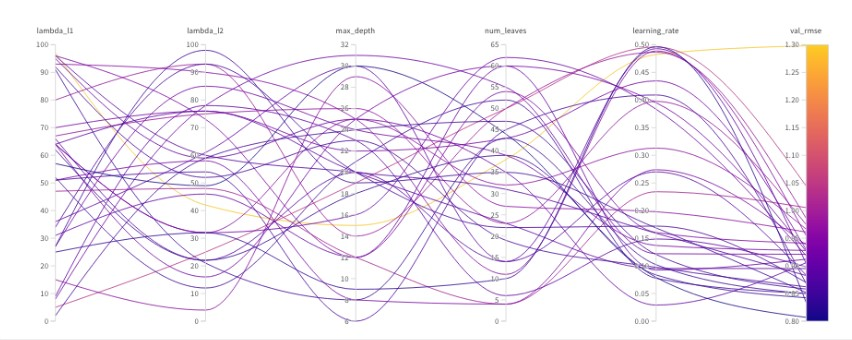

### Training the model on full data

In [97]:
X_train = df_train[continuous_feature]
y_train = df_train[target]

train_ds = lgb.Dataset(X_train, label = y_train)

model = lgb.train(params, 
                train_ds, 
                num_boost_round = 1000, 
                #valid_sets = [train_ds, valid_ds], 
                #early_stopping_rounds = 100,
               verbose_eval = 200
               )

[LightGBM] [Info] Total Bins 59691
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 239
[LightGBM] [Info] Start training from score 11.858568


In [98]:
model

In [99]:
model.predict(df_test[continuous_feature])

array([ 9.81617098,  9.85391097,  9.86870505, ...,  0.22885695,
        0.08516006, -0.06276488])

In [100]:
submission = pd.read_csv('sample_solution.csv')
display(submission)
submission[target] = model.predict(df_test[continuous_feature])

submission.to_csv('submission.csv', index=False) # Set index to false to avoid issues

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738
...,...,...
31349,28.303967,407083
31350,26.635933,407084
31351,27.057762,407085
31352,26.871066,407086


## References
- WiDS 2023] Simple basline - RMSE 1.14 by DAT DO used as base especially for preprocessing.
- WiDS Datathon 2023: Forecasting with LGBM by LEONIE for Feature Engineering.
- https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved
